https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_russian/topic07_unsupervised/lesson7_part3_kmeans.ipynb

# Кластеризация

Сгенерируем точки из трех кластеров

Populating the interactive namespace from numpy and matplotlib


C:\Users\elena\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0, 0.5, 'y')

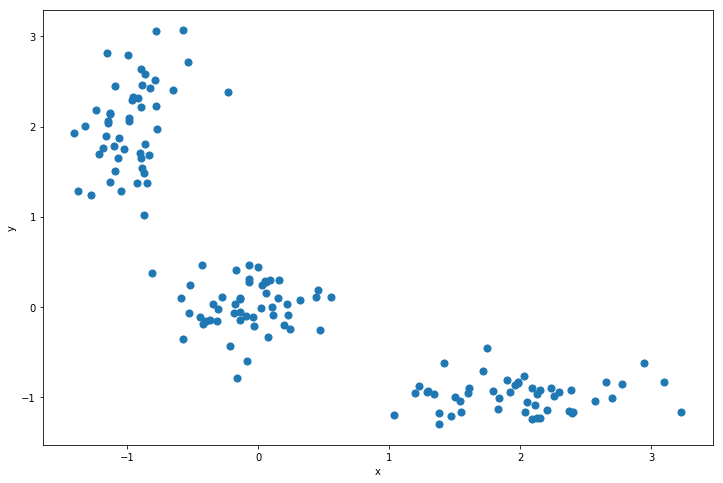

In [2]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pylab as plt
%pylab inline

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(12,8))
plt.scatter(X[...,0], X[...,1], s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

Применим kmeans

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Text(0, 0.5, 'y')

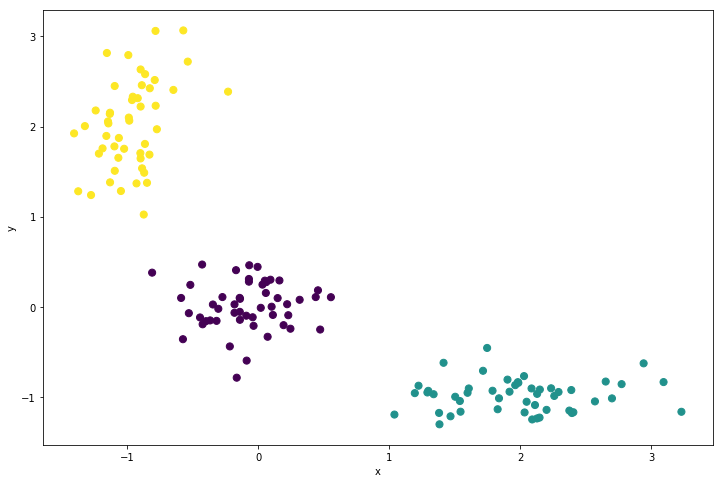

In [3]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)
print(kmeans.labels_)

#df['ClusterNum'] = kmeans.labels_

plt.figure(figsize=(12,8))
plt.scatter(X[...,0], X[...,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

Применим иерархическую кластеризацию.

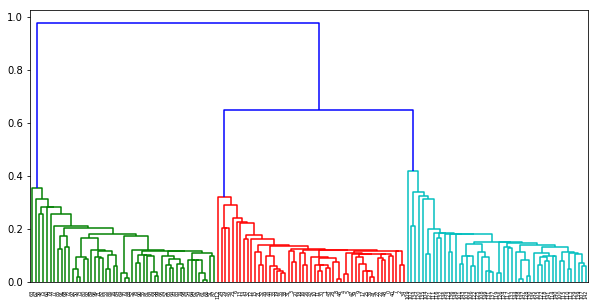

In [216]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

### Пример: кластеризация игроков NBA

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

nba = pd.read_csv("nba_2013.csv")
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [218]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

Примените kmeans с 5ю кластерами только к числовым столбцам.

In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

numeric_cols = nba._get_numeric_data().dropna(axis=1)

#your code here
kmeans = KMeans(n_clusters=5)
kmeans.fit(numeric_cols)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Визуализируйте данные с помощью метода главных компонент с n_components = 2:

    1) Примените метод главных компонент
    
    2) Нарисуйте полученные точки на плоскости, раскрашенные в цвета, соответствующие кластерам (см. пример выше)

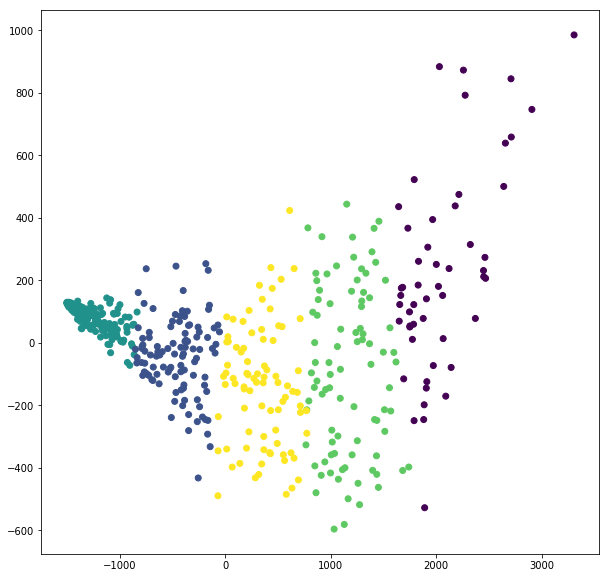

In [8]:
#your code here

plt.figure(figsize=(10,10))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(numeric_cols)

plt.scatter(X_pca[...,0], X_pca[...,1], c=kmeans.labels_)

Посмотрим, какое смысловое значение несут кластеры.

1) Визуализируйте точки в осях nba['pts'] (total points) и nba['ast'] (total assistances) и раскрасьте их в цвета кластеров.

2) Визуализируйте точки в осях nba['age'] (age) и nba['mp'] (minutes played) и раскрасьте их в цвета кластеров.

Подпишите оси.

Text(0, 0.5, 'assists')

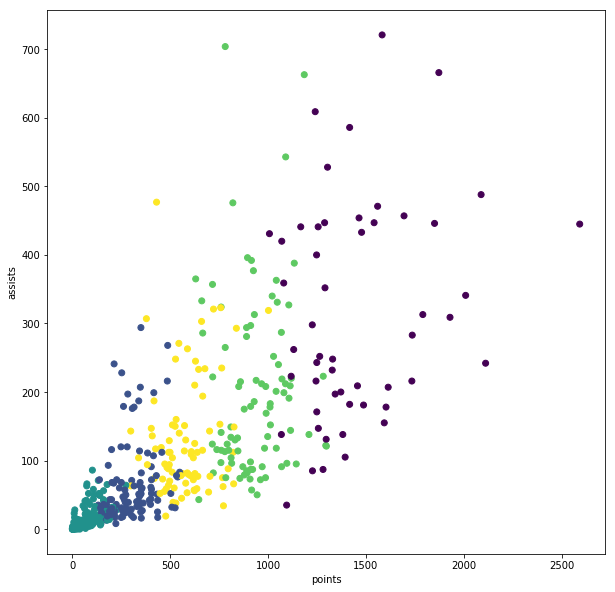

In [11]:
#your code here

plt.figure(figsize=(10,10))
plt.scatter(numeric_cols['pts'], numeric_cols['ast'], c=kmeans.labels_)
plt.xlabel('points')
plt.ylabel('assists')

Text(0, 0.5, 'age')

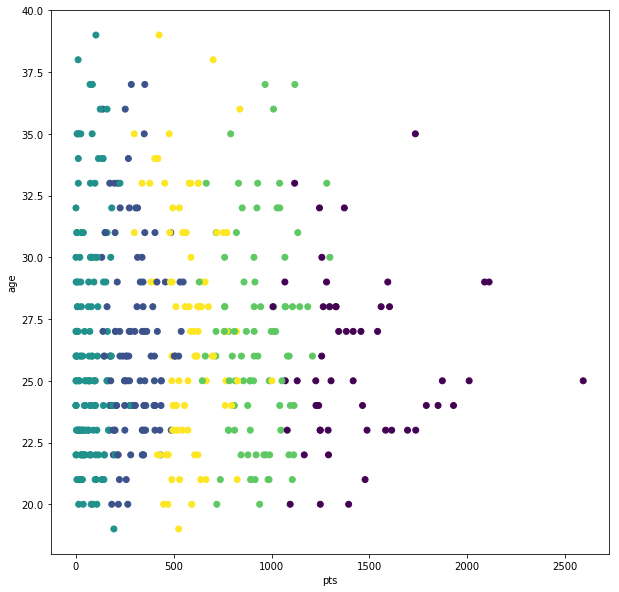

In [13]:
#your code here

plt.figure(figsize=(10,10))
plt.scatter(numeric_cols['pts'], numeric_cols['age'], c=kmeans.labels_)
plt.xlabel('pts')
plt.ylabel('age')

### Инициализация центроидов

Метод `sklearn.KMeans` содержит параметры `n_init` (число запусков из различных начальных приближений) и `init`. Есть три способа инициализации центроидов:
- `k-means++` – "умная" инициализация центроидов для ускорения сходимости.
- `random` – случайная инициализация центроидов.
- `ndarray` – заданная инициализация центроидов.

## Сжатие изображений с K-means

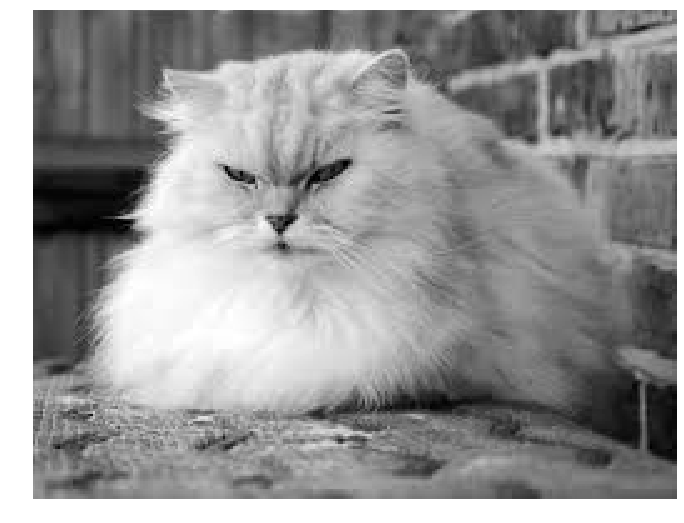

In [14]:
import matplotlib.image as mpimg
img = mpimg.imread('cat.jpg')[..., 1]
plt.figure(figsize = (15, 9))
plt.axis('off')
plt.imshow(img, cmap='gray');

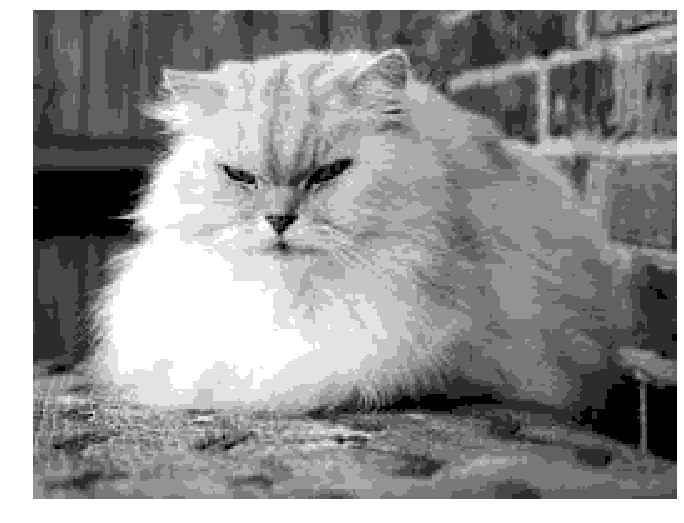

In [15]:
from sklearn.cluster import MiniBatchKMeans
from scipy.stats import randint

X = img.reshape((-1, 1))
k_means = MiniBatchKMeans(n_clusters=10)
k_means.fit(X) 
values = k_means.cluster_centers_
labels = k_means.labels_
img_compressed = values[labels].reshape(img.shape)
plt.figure(figsize = (15, 9))
plt.axis('off')
plt.imshow(img_compressed, cmap = 'gray');

Возьмите любую фотографию (можно работать с той же) и подберите минимальное число кластеров, которое визуально не ухудшает качество изображения.

In [ ]:
#your code here

# Нахождение тем в текстах

**Применим KMeans для кластеризации текстов из 4 новостных категорий.**

In [16]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from time import time

categories = [
    'talk.politics.misc',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space']

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

labels = dataset.target
true_k = np.unique(labels).shape[0]

Loading 20 newsgroups dataset for categories:
['talk.politics.misc', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3363 documents
4 categories


**Закодируем тексты с помощью TF-IDF признаков.**

![How](tf-idf.png)

In [17]:
print("Extracting features from the training dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english')

X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)

Extracting features from the training dataset using a sparse vectorizer
n_samples: 3363, n_features: 1000


**И применим к получившимся векторам метод $k$ средних и выведем метрики качества кластеризации.**

In [18]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
Homogeneity: 0.513
Completeness: 0.568
V-measure: 0.539
Adjusted Rand-Index: 0.497
Adjusted mutual info score: 0.512
Silhouette Coefficient: 0.016


C:\Users\elena\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


**Выведем слова, соответствующие самым весомым компонентам центров кластеров.**

In [19]:
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % (i + 1), end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 1: god sandvik jesus kent brian apple com newton christian bible
Cluster 2: com people don cramer just government like optilink think new
Cluster 3: graphics university thanks image posting host ac nntp file uk
Cluster 4: space nasa henry access digex gov pat toronto alaska shuttle


## Кластеризация рукописных цифр

In [20]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target
Im = digits.images

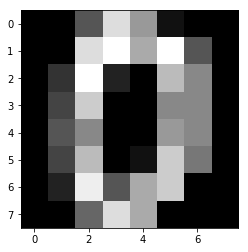

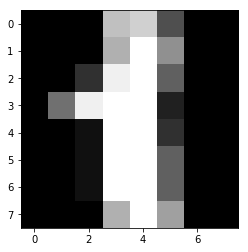

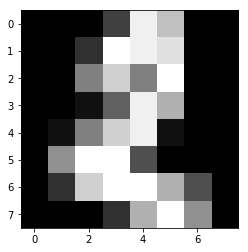

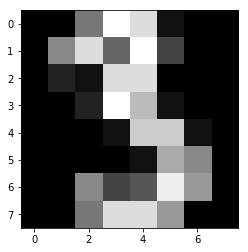

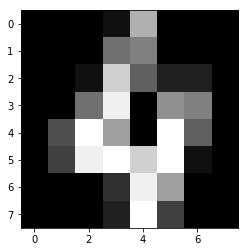

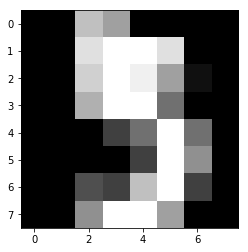

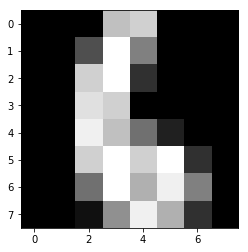

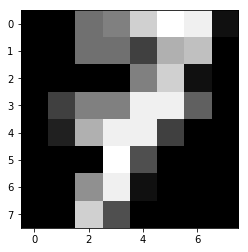

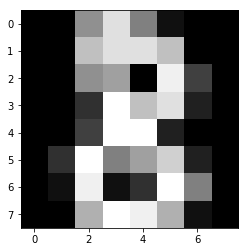

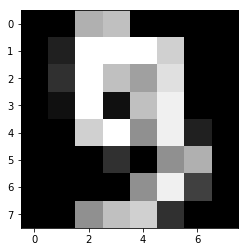

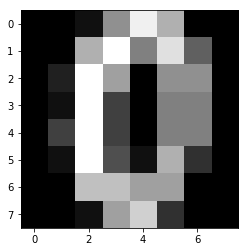

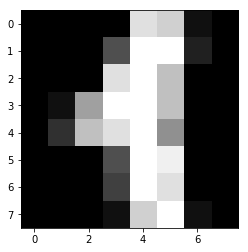

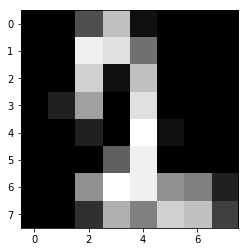

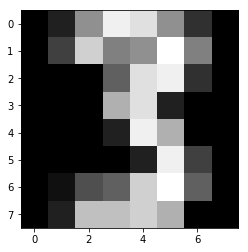

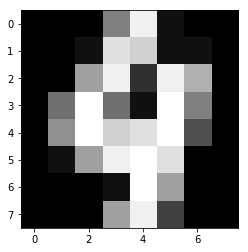

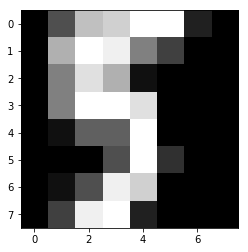

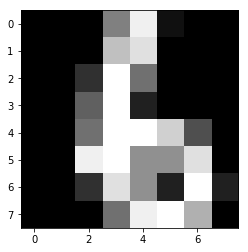

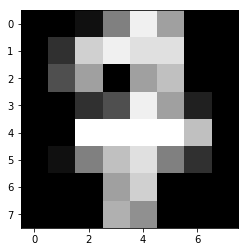

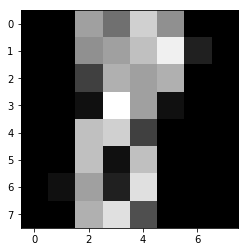

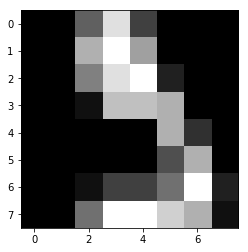

In [24]:
for i in range(20):
    plt.imshow(Im[i], cmap='gray');
    plt.show()

Выведите на экран первые 20 цифр (в цветовой схеме 'gray')

In [27]:
#your code here

print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(y, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(y, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(y, km.labels_))
print("Adjusted mutual info score: %.3f"
      % metrics.adjusted_mutual_info_score(y, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=100))

Homogeneity: 0.741
Completeness: 0.750
V-measure: 0.745
Adjusted Rand-Index: 0.668
Adjusted mutual info score: 0.738
Silhouette Coefficient: 0.171


C:\Users\elena\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Обучите kmeans с десятью кластерами.

In [25]:
#your code here

km = KMeans(n_clusters=10)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Выведите на экран метрики качества кластеризации

In [210]:
#your code here

Homogeneity: 0.742
Completeness: 0.751
V-measure: 0.746
Adjusted Rand-Index: 0.670
Adjusted mutual info score: 0.739
Silhouette Coefficient: 0.183


C:\Users\elena\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Нарисуем центры получившихся кластеров.

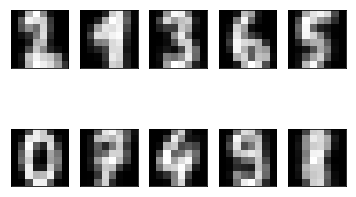

In [190]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(center.reshape(8, 8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

Кластеризация получилась довольно качественной. Визуализируем наши объекты (изображения цифр) как точки на двумерной плоскости.

Визуализируйте данные с помощью PCA с двумя компонентами.

Projecting 64-dimensional data to 2D


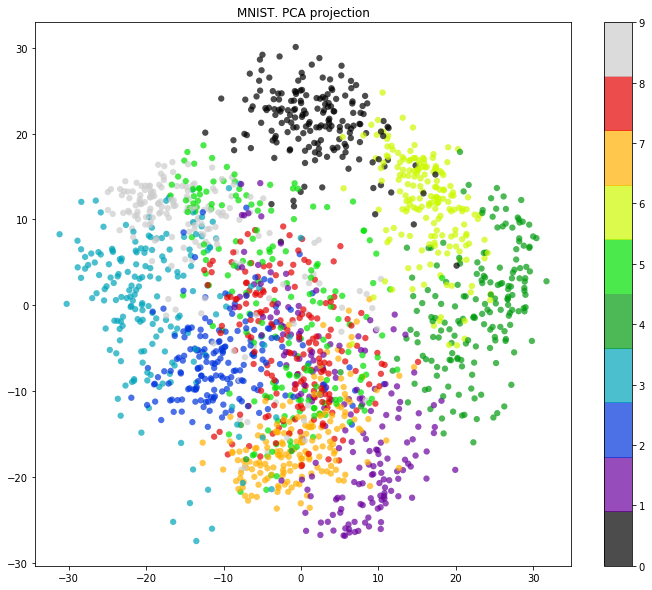

In [28]:
from sklearn.decomposition import PCA

#your code here
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection');

Визуализируем данные с помощью t-SNE

Wall time: 29.1 s


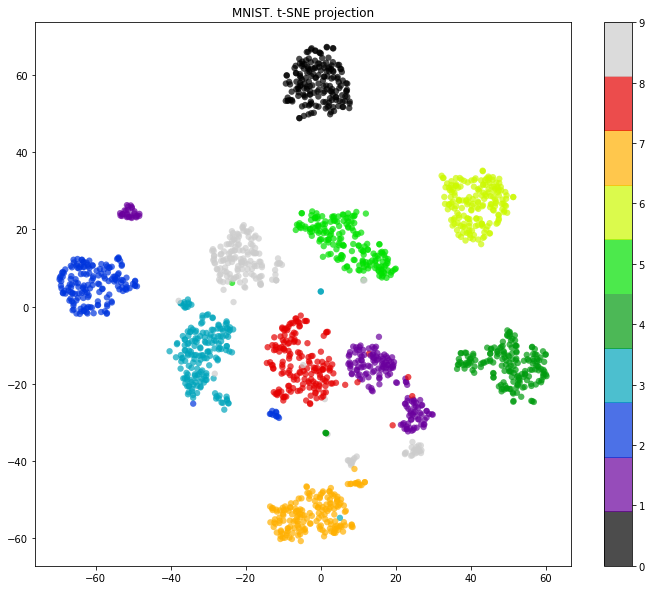

In [29]:
%%time

from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection');

## Полезные ссылки
- <a href="https://en.wikipedia.org/wiki/K-means_clustering">k-means</a> на Википедии
- <a href="">Статья</a> про нечеткую кластеризацию городов по социально-экономическим показателям на Хабрахабре
- <a href="https://scikit-learn.org/stable/modules/clustering.html">обзор</a> методов кластеризации в sklearn

# Домашнее задание

В этом задании мы попрактикуемся в методах снижения размерности и кластеризации данных. 

Мы будем работать с набором данных Samsung Human Activity Recognition. Скачайте данные по ссылке https://yadi.sk/d/_WFxgSIuBF06Rg. Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков.

In [219]:
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [ ]:
X_train = np.loadtxt("../../data/samsung_HAR/samsung_train.txt")
y_train = np.loadtxt("../../data/samsung_HAR/samsung_train_labels.txt").astype(int)

X_test = np.loadtxt("../../data/samsung_HAR/samsung_test.txt")
y_test = np.loadtxt("../../data/samsung_HAR/samsung_test_labels.txt").astype(int)

Для кластеризации нам не нужен вектор ответов. Объедините обучающую и тестовую выборки.

In [ ]:
#your code here
X = 
y =

In [ ]:
np.unique(y)

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

Отмасштабируйте выборку с помощью StandardScaler.

In [ ]:
#your code here
scaler = 
X_scaled =

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state.

In [ ]:
#your code here
pca = 
X_pca =

Визуализируйте данные в проекции на первые две главные компоненты.

In [ ]:
#your code here
plt.scatter(, , c=y, s=20, cmap='viridis');

Сделайте кластеризацию данных методом KMeans, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае нужно искать 6 кластеров (так как у нас 6 классов).

Параметры:

n_clusters = n_classes (число уникальных меток целевого класса)

n_init = 100

random_state = RANDOM_STATE (для воспроизводимости результата)

In [ ]:
#your code here

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

In [ ]:
#your code here

Выведите на экран значения метрик качества кластеризации

In [ ]:
#your code here

Теперь попробуем сделать кластеризацию с помощью AgglomerativeClustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [ ]:
ag = AgglomerativeClustering(n_clusters=n_classes, 
                             linkage='ward').fit(X_pca)

Выведите метрики качества для полученного разбиения на кластеры. Сравните с kmeans. Запишите выводы!

In [ ]:
#your code here

Попробуйте применить другие методы кластеризации из sklearn. Также вычислите метрики качества и сделайте вывод о том, какой метод сработал лучше.

In [ ]:
#your code here